In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('data/train.csv',low_memory=False)

In [8]:
data.head()
data.dropna()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,record_id;;
3,4200.0,36 months,13.33,142.19,C,C3,Receptionist,< 1 year,MORTGAGE,21600.0,...,19.0,w,0.0,1.0,INDIVIDUAL,0.0,165.0,28187.0,14500.0,453447199;;
7,14000.0,36 months,15.31,487.45,C,C2,Department of the Army,10+ years,MORTGAGE,96000.0,...,29.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,276267.0,39700.0,453322484;;
16,8650.0,36 months,12.12,287.80,B,B3,Haven Hospice,8 years,RENT,76000.0,...,20.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,614403.0,10000.0,453286318;;
17,25000.0,60 months,17.27,624.95,C,C5,Cheney Public Schools,6 years,MORTGAGE,108000.0,...,40.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,337866.0,23800.0,453277374;;
19,9250.0,36 months,16.49,327.45,D,D3,teaching,10+ years,OWN,18500.0,...,27.0,w,0.0,1.0,INDIVIDUAL,0.0,406.0,154326.0,3900.0,453356047;;
20,10000.0,36 months,11.53,329.91,B,B5,asst manager,5 years,RENT,36000.0,...,21.0,f,0.0,1.0,INDIVIDUAL,0.0,92.0,25994.0,21500.0,453448530;;
21,9900.0,36 months,9.67,317.92,B,B1,Senior System Administrator,8 years,MORTGAGE,97000.0,...,26.0,w,0.0,1.0,INDIVIDUAL,0.0,0.0,160384.0,19700.0,453399907;;
30,28000.0,36 months,11.99,929.87,B,B3,Shift manager,10+ years,MORTGAGE,132000.0,...,38.0,f,0.0,1.0,INDIVIDUAL,0.0,250.0,271759.0,35900.0,453422515;;
31,10000.0,36 months,13.66,340.13,C,C3,Housekeeper Aid,6 years,OWN,40000.0,...,21.0,w,1.0,1.0,INDIVIDUAL,0.0,0.0,10144.0,26300.0,453454448;;
34,8000.0,36 months,10.15,258.71,B,B2,Oder picker,10+ years,RENT,34000.0,...,37.0,w,0.0,1.0,INDIVIDUAL,0.0,0.0,21686.0,9900.0,453358765;;


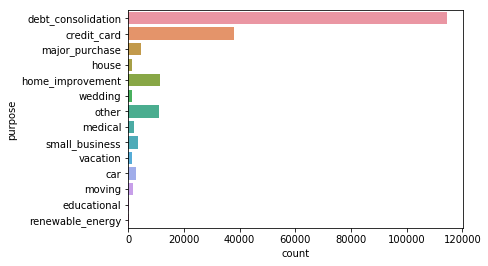

In [4]:
sns.countplot(y = 'purpose',  data = data);


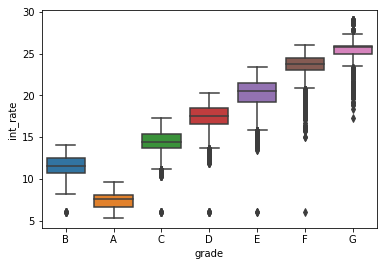

In [6]:
sns.boxplot(y = 'int_rate', x = 'grade',  data = data);

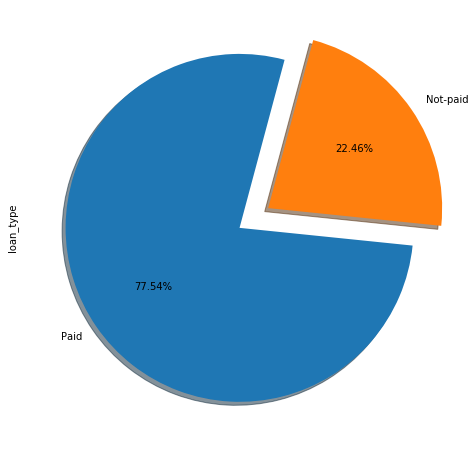

In [14]:
data['loan_type'] = data['loan_status'].map({1.0: 'Paid', 0.0: 'Not-paid'})
plt.figure(figsize=(8,8))
data.loan_type.value_counts().plot.pie(explode = [0, 0.2],autopct='%1.2f%%', shadow = True, startangle = 75);

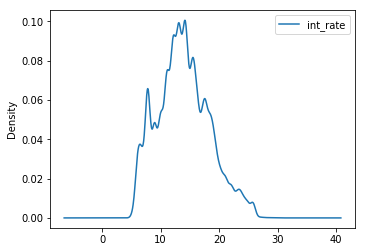

In [9]:
loan_c = ['loan_amnt', 'int_rate']

data[loan_c].plot(kind='density', subplots=True, 
                  layout=(1, 2), sharex=False, figsize=(12, 4));

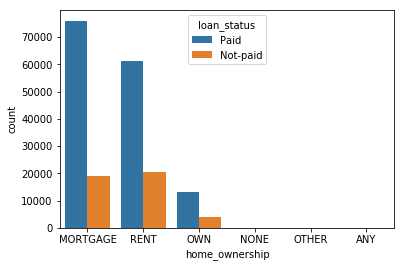

In [10]:
data.dropna()
sns.countplot(x = 'home_ownership', hue = data['loan_status'].map({1.0: 'Paid', 0.0: 'Not-paid'}),  data = data);

In [ ]:
d = {}
for state in data['addr_state'].unique():
    values = data[data['addr_state']==state].loan_type.value_counts()

    d[state] = round(float(values[1])/float(values[0])*100,2)
    

import operator
sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True) 
x, y = zip(*sorted_d) 

plt.figure(figsize=(16,8))
plt.bar(x,y)


In [ ]:
data['addr_state'].unique()

In [ ]:
d = {}
data['loan_type'] = data['loan_status'].map({1.0: 'Paid', 0.0: 'Not-paid'})
for purpose in data['purpose'].unique():
    values = data[data['purpose']==purpose].loan_type.value_counts()
    d[purpose] = round(float(values[1])/float(values[0])*100,2)



In [ ]:
data['loan_type'] = data['loan_status'].map({1.0: 'Paid', 0.0: 'Not-paid'})
sns.barplot(x=data.home_ownership, y=data.loan_amnt, hue=data.loan_type)